In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [2]:
pose_columns = list(["time", "type", "x", "y", "z"])

list_of_smoothed_path_df = list()

smoothed_path_df = pd.DataFrame(columns=pose_columns)
with open('/home/locomotion/latency_evaluations/pose_uncertainty_0.txt') as f:
    lines = f.readlines()
    first_time = float(lines[1].split()[0])
    print first_time
    
    for line in lines:    
        words = line.split()
        if words[0] == "NEW_SMOOTHED_PATH":
            print words[0]
            if not smoothed_path_df.empty:
                list_of_smoothed_path_df.append(smoothed_path_df)
            smoothed_path_df = pd.DataFrame(columns=pose_columns)
        else:
            for index,val in enumerate(words):
                words[index] = float(val)
            smoothed_x = words[1]
            smoothed_y = words[2]
            smoothed_z = words[3]
            j = 4
            for i in range(1,4):
                if i == 0:
                    pose_type = "pose_smoothed"
                if i == 1:
                    pose_type = "pose_available"
                if i == 2:
                    pose_type = "pose_fp"
                if i == 3:
                    pose_type = "pose"
                smoothed_path_df_add = pd.DataFrame([[words[0]-first_time, pose_type, 
                                                      words[j]-smoothed_x, 
                                                      words[j+1]-smoothed_y, 
                                                      words[j+2]-smoothed_z]], columns=pose_columns)
                smoothed_path_df = smoothed_path_df.append(smoothed_path_df_add, ignore_index=True)
                j = j + 3
            
        

1487624064.89
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH
NEW_SMOOTHED_PATH


In [3]:
print len(list_of_smoothed_path_df)

16


time           12.8076
type    pose_available
x             4.28e-06
y          -5.8085e-05
z             -9.8e-06
Name: 0, dtype: object


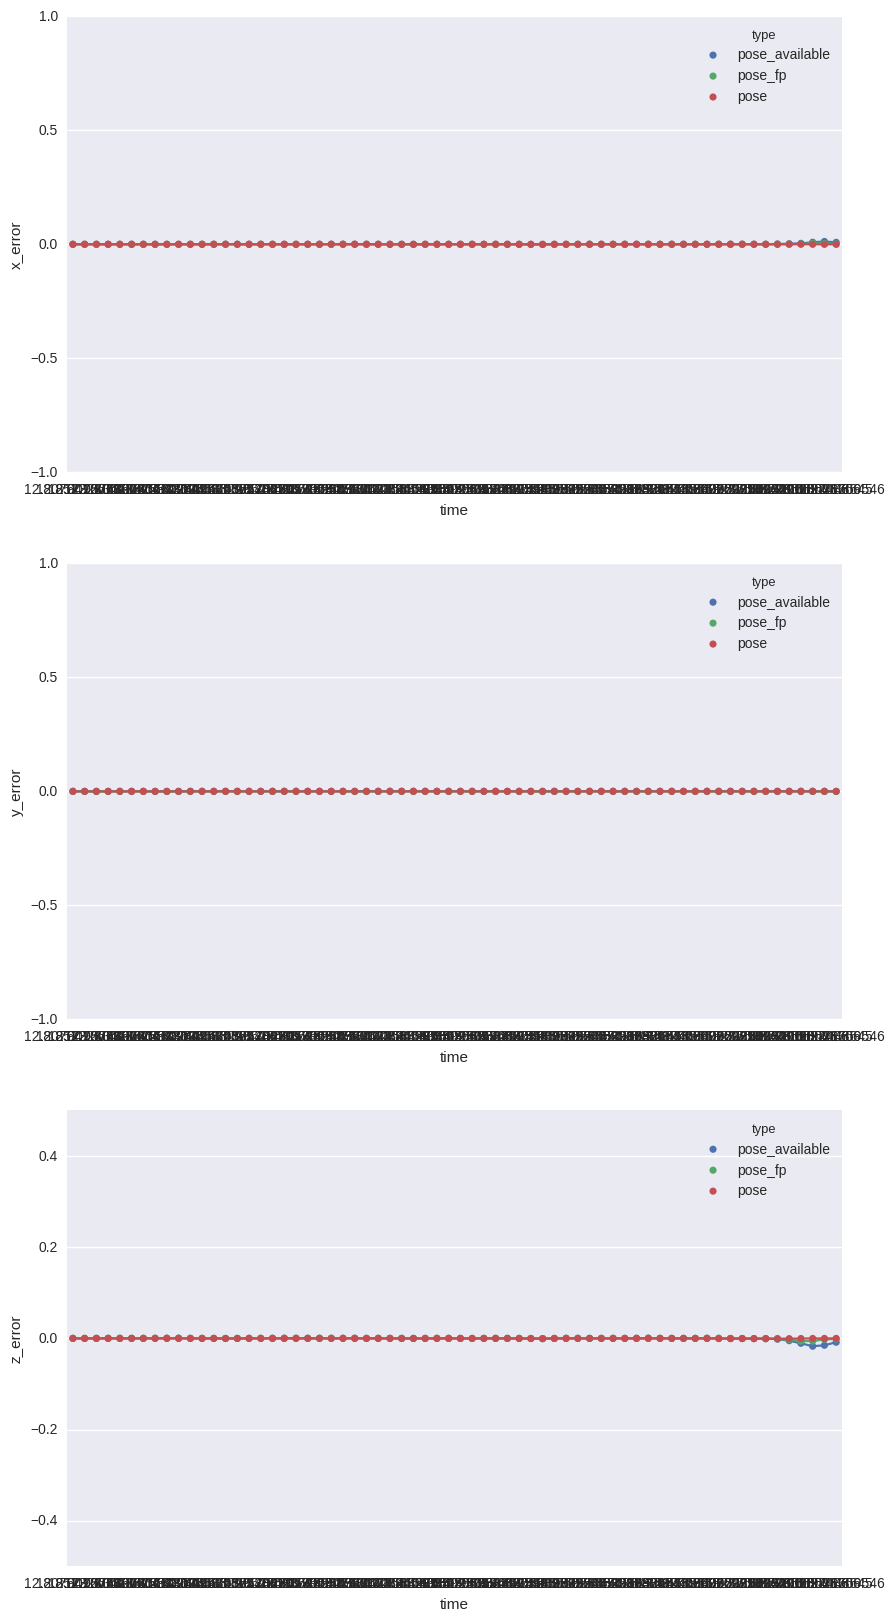

time           15.9101
type    pose_available
x           0.00010496
y          -0.00126195
z           -0.0264692
Name: 0, dtype: object


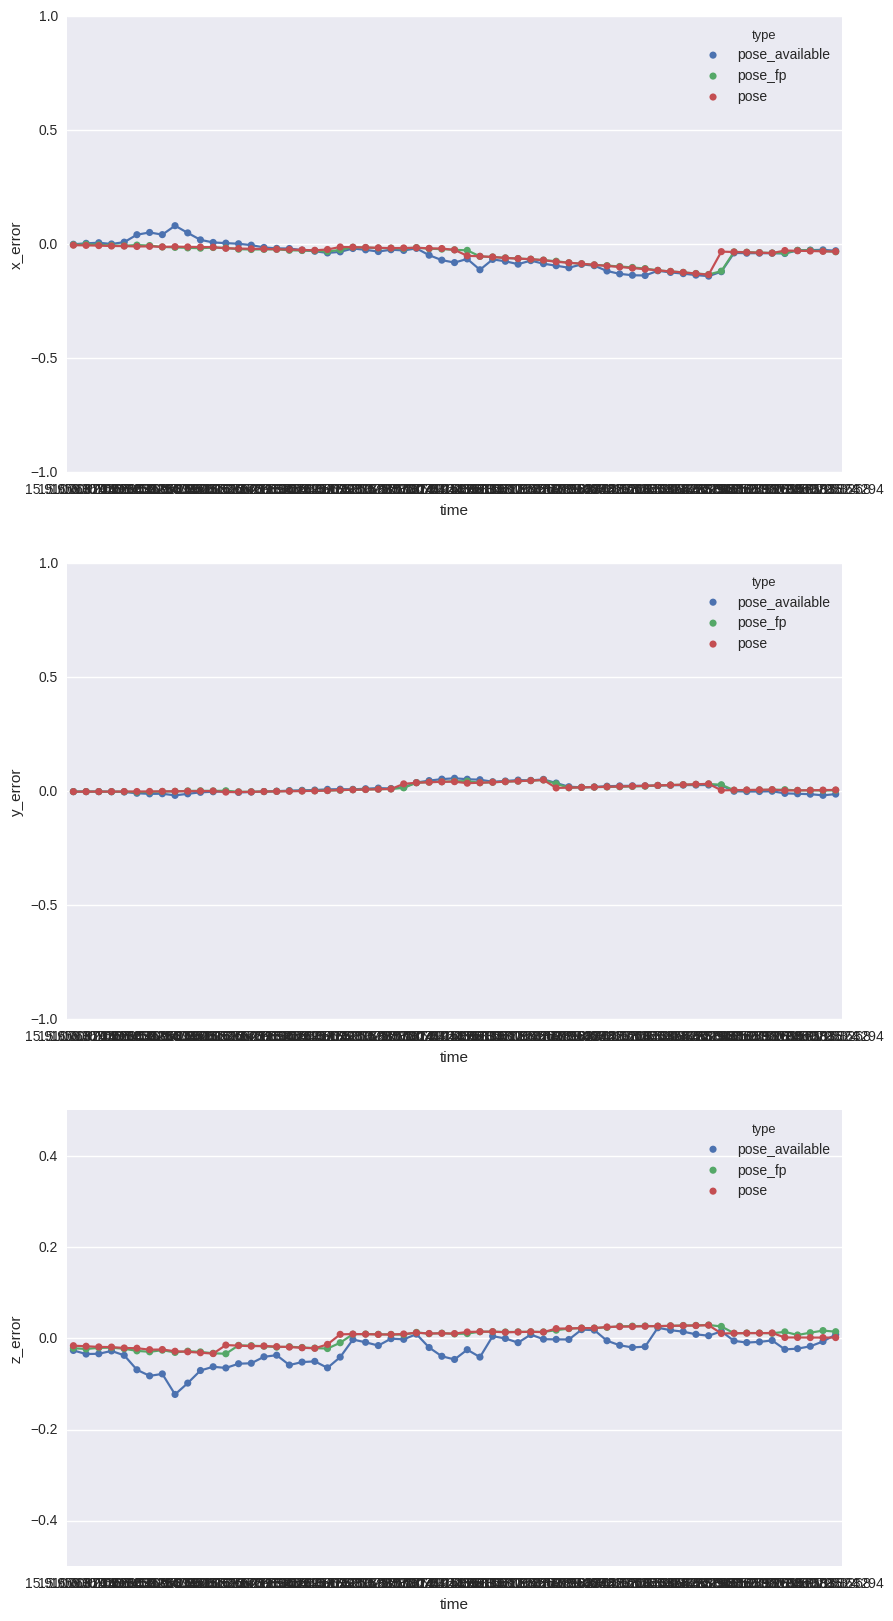

time           19.3112
type    pose_available
x            -0.050121
y           -0.0772133
z               0.0648
Name: 0, dtype: object


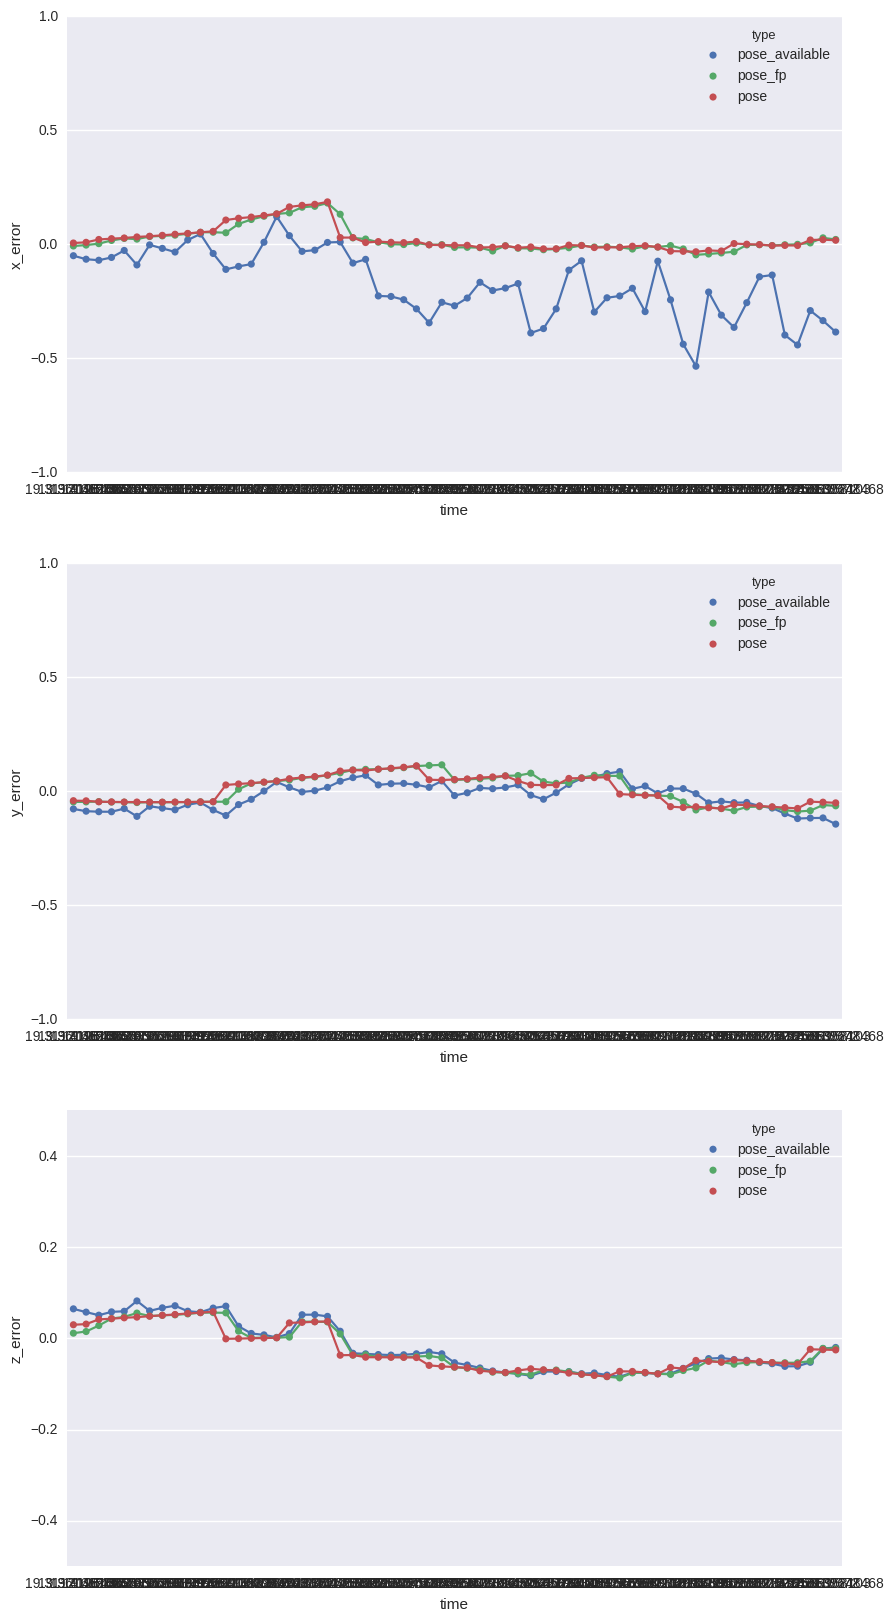

time           22.4636
type    pose_available
x              -0.1752
y              0.04872
z             -0.27353
Name: 0, dtype: object


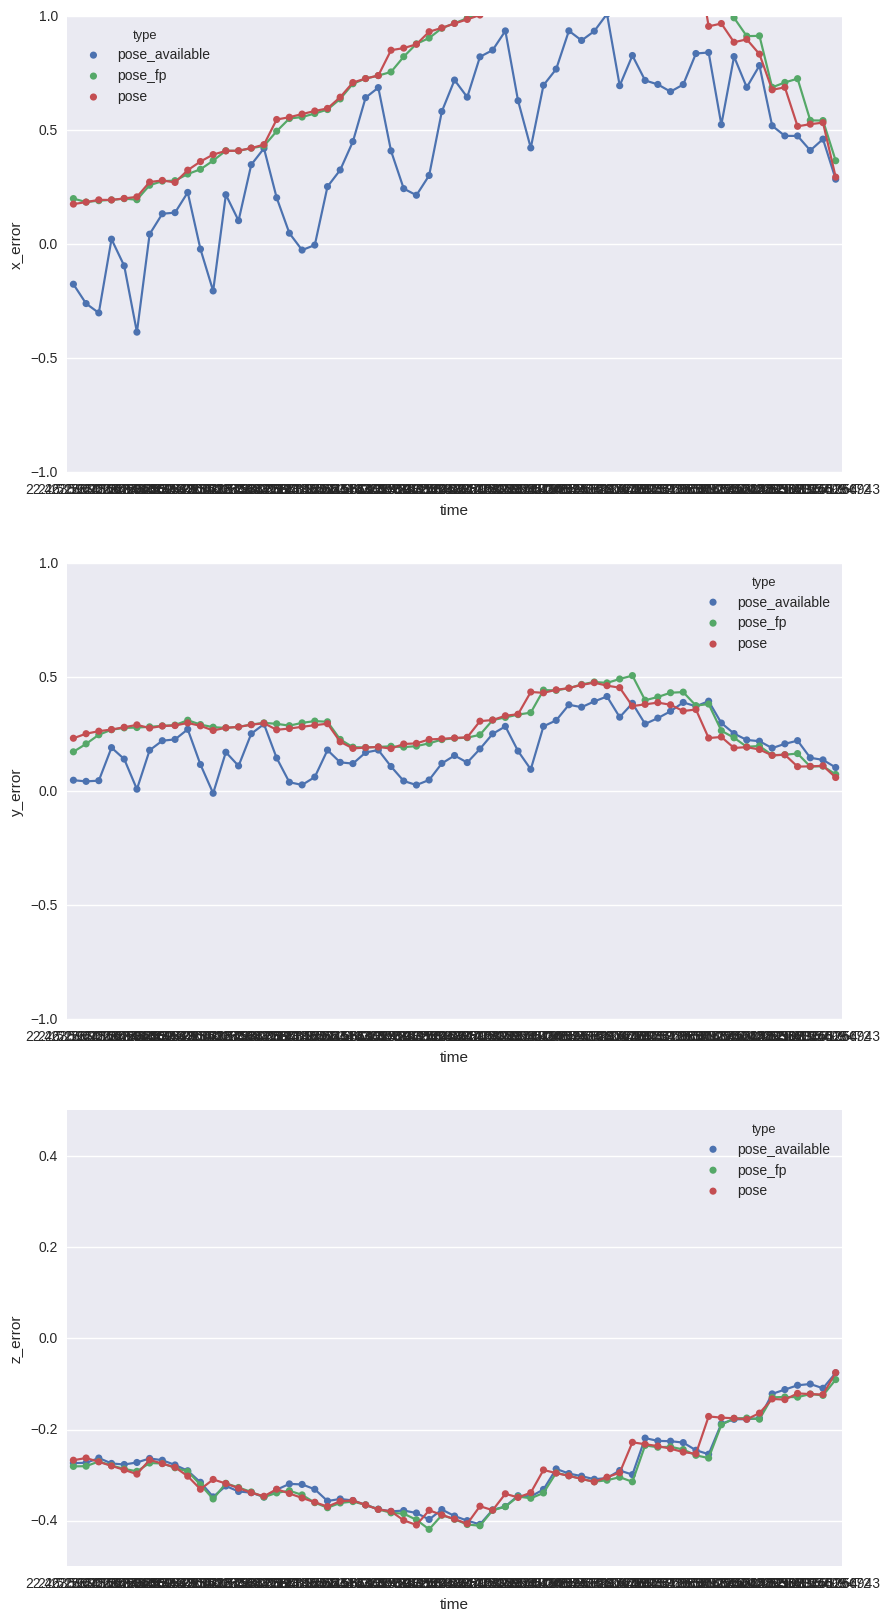

time            25.618
type    pose_available
x              -0.7694
y             -0.16211
z              -0.3964
Name: 0, dtype: object


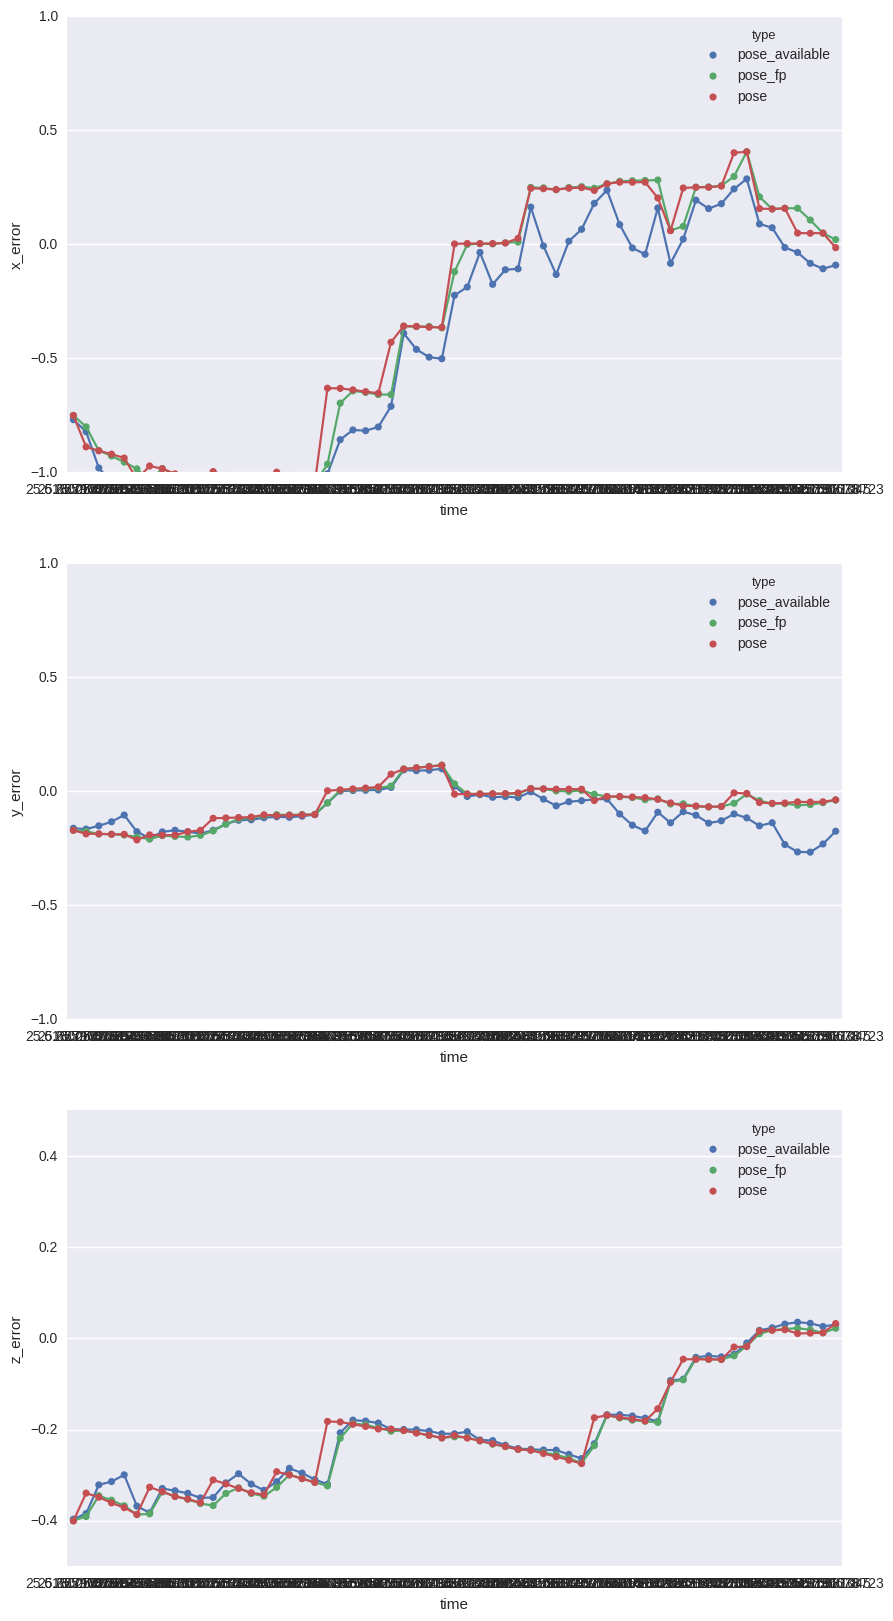

time           28.5173
type    pose_available
x              -0.2317
y              -0.2789
z              0.03496
Name: 0, dtype: object


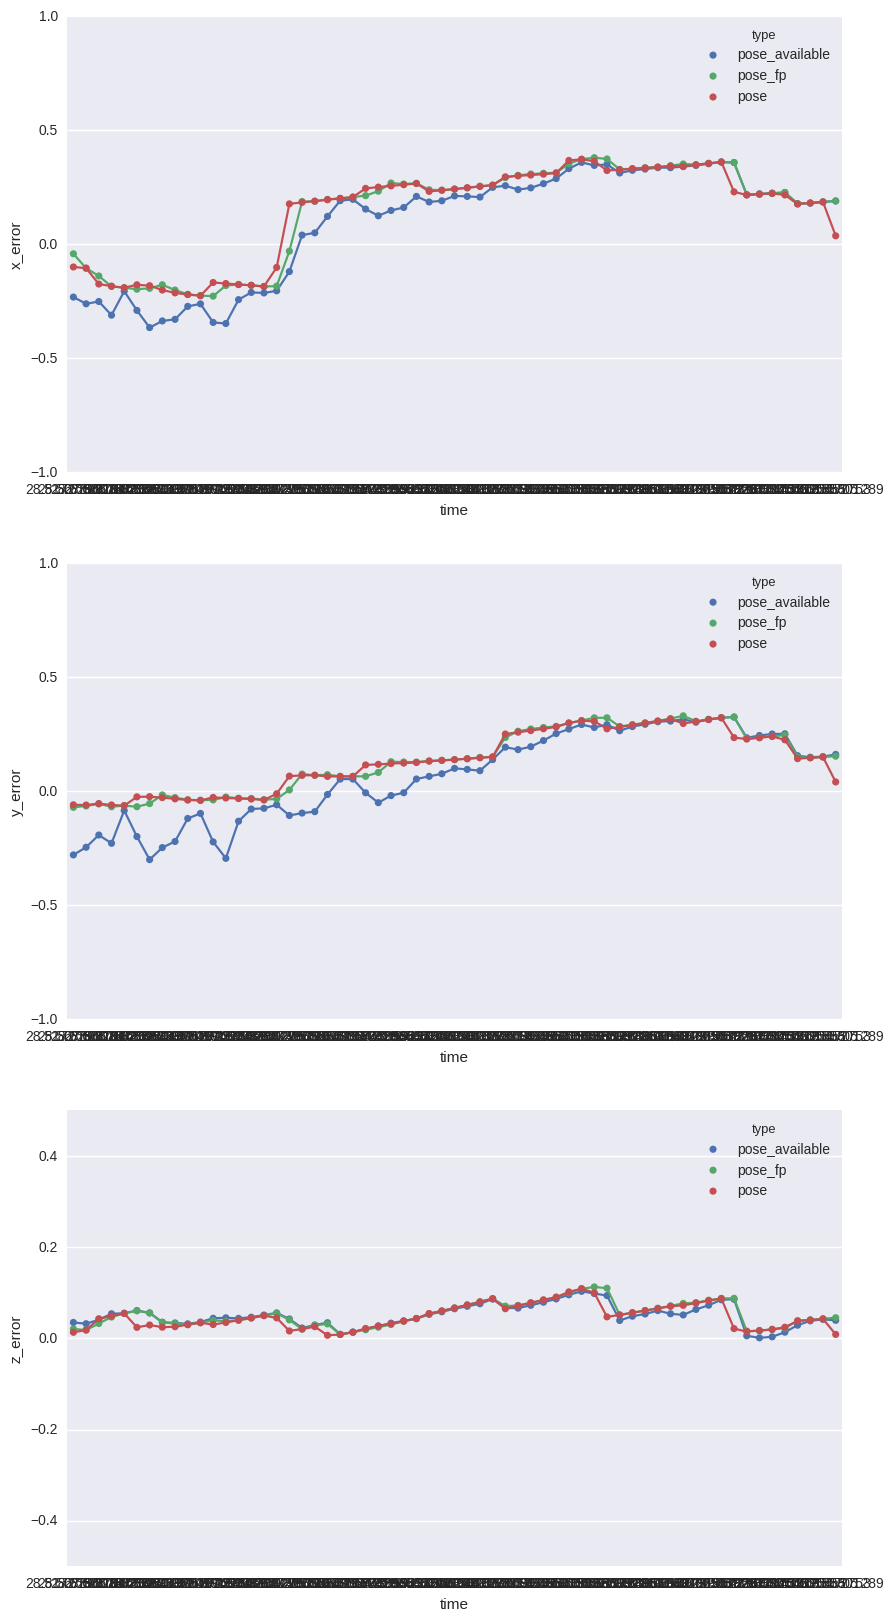

time           31.8196
type    pose_available
x               0.1208
y               0.1765
z             -0.00727
Name: 0, dtype: object


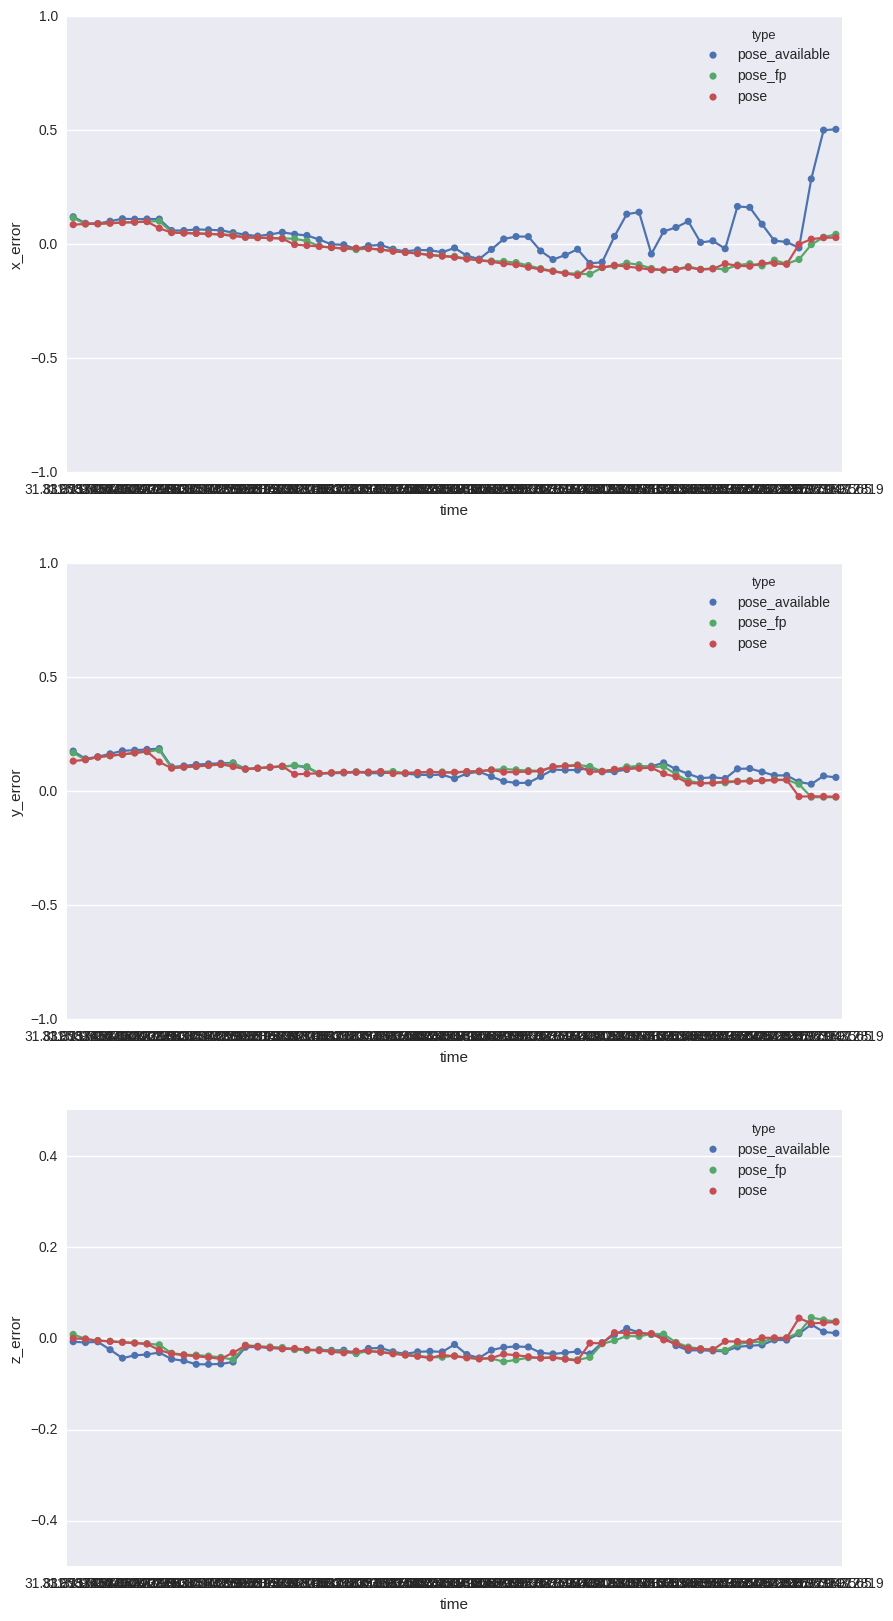

time           35.2241
type    pose_available
x               0.8422
y               0.0649
z              0.01278
Name: 0, dtype: object


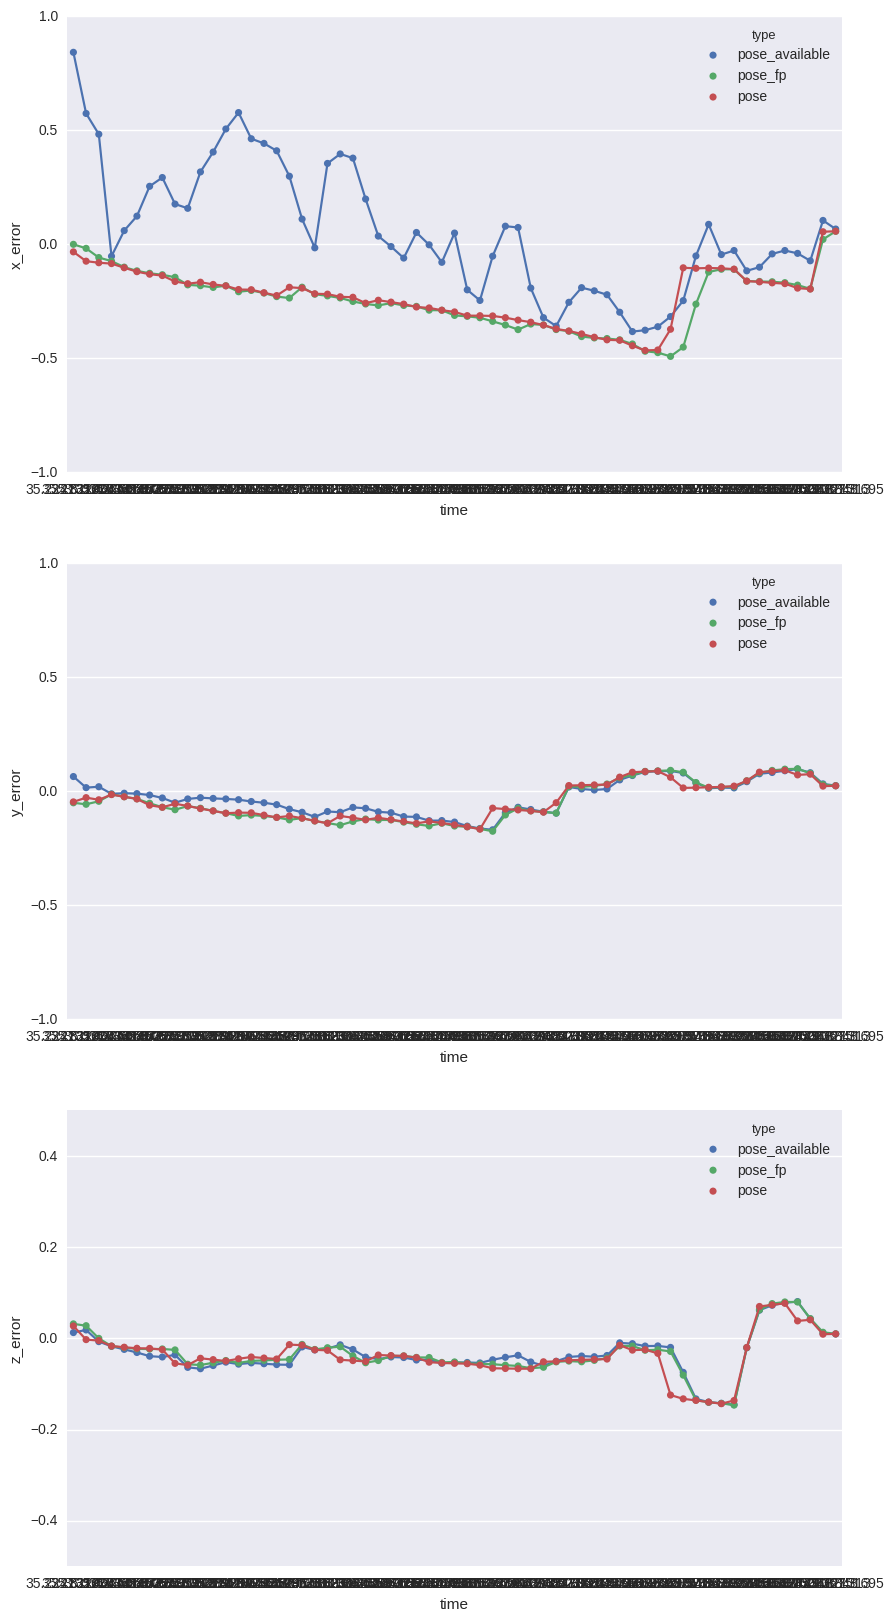

time           38.1242
type    pose_available
x              -0.5109
y               0.1172
z              0.01052
Name: 0, dtype: object


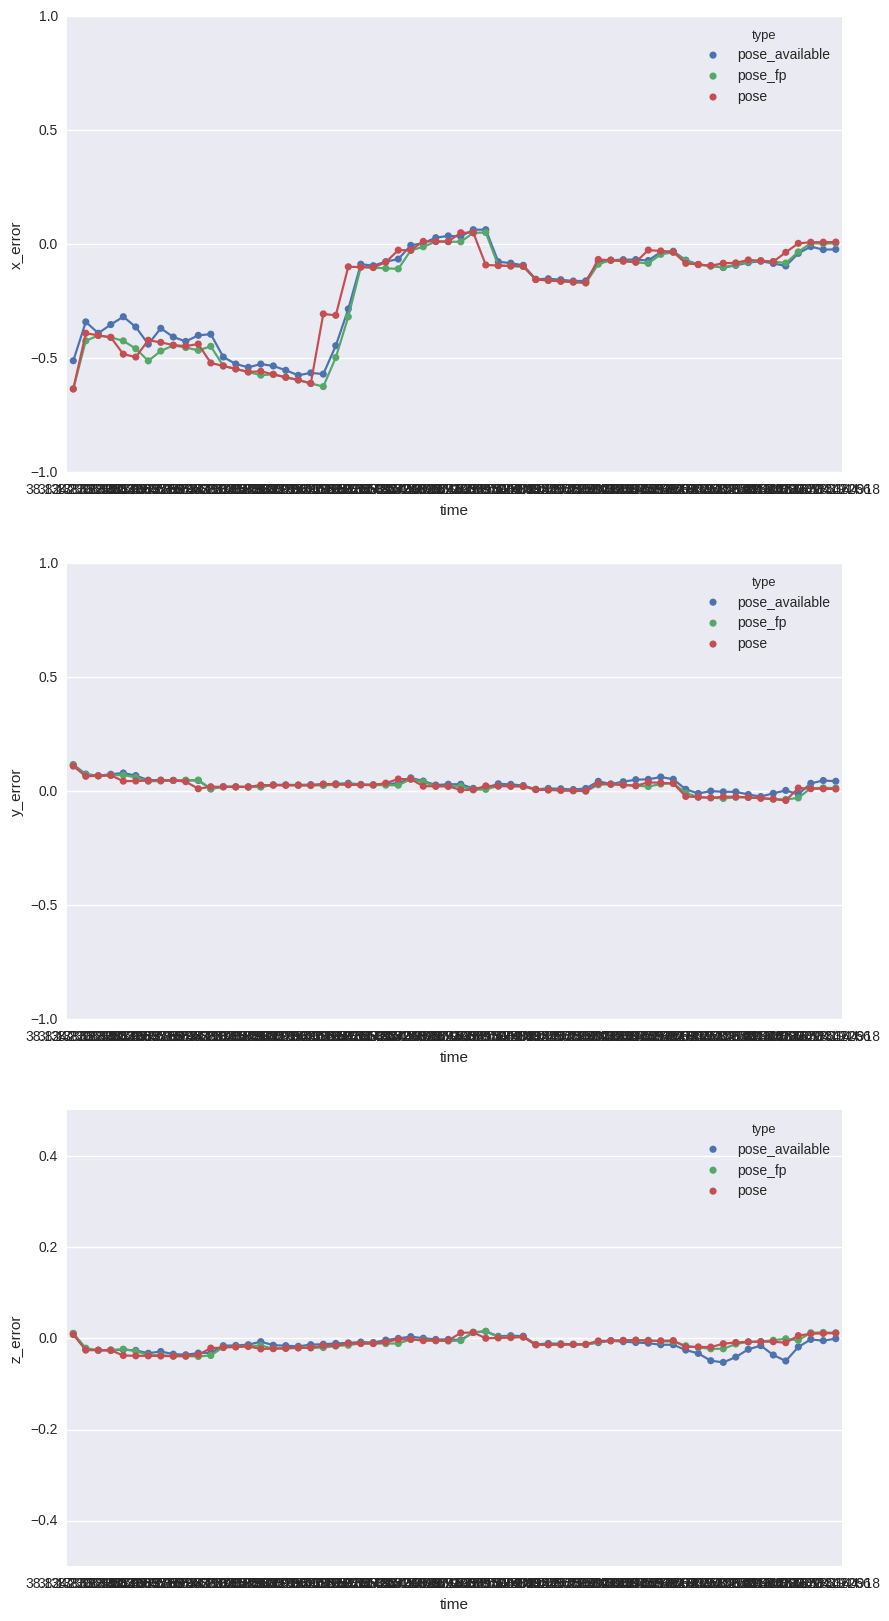

time            41.477
type    pose_available
x               0.0916
y               0.0377
z             -0.01194
Name: 0, dtype: object


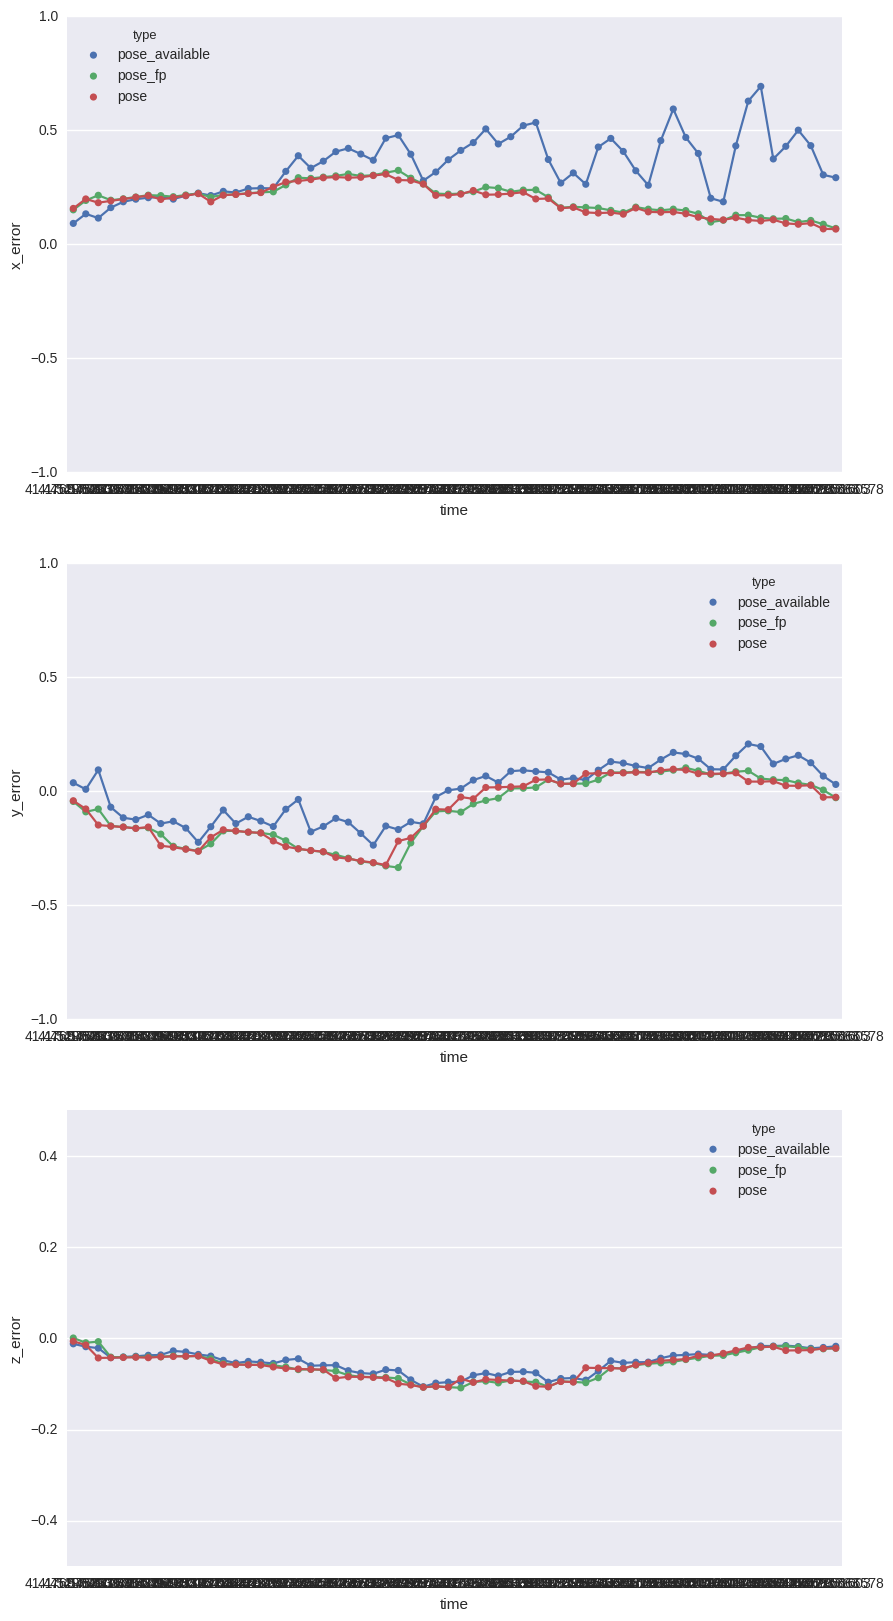

time           44.6778
type    pose_available
x              -0.3317
y             -0.16984
z             -0.29145
Name: 0, dtype: object


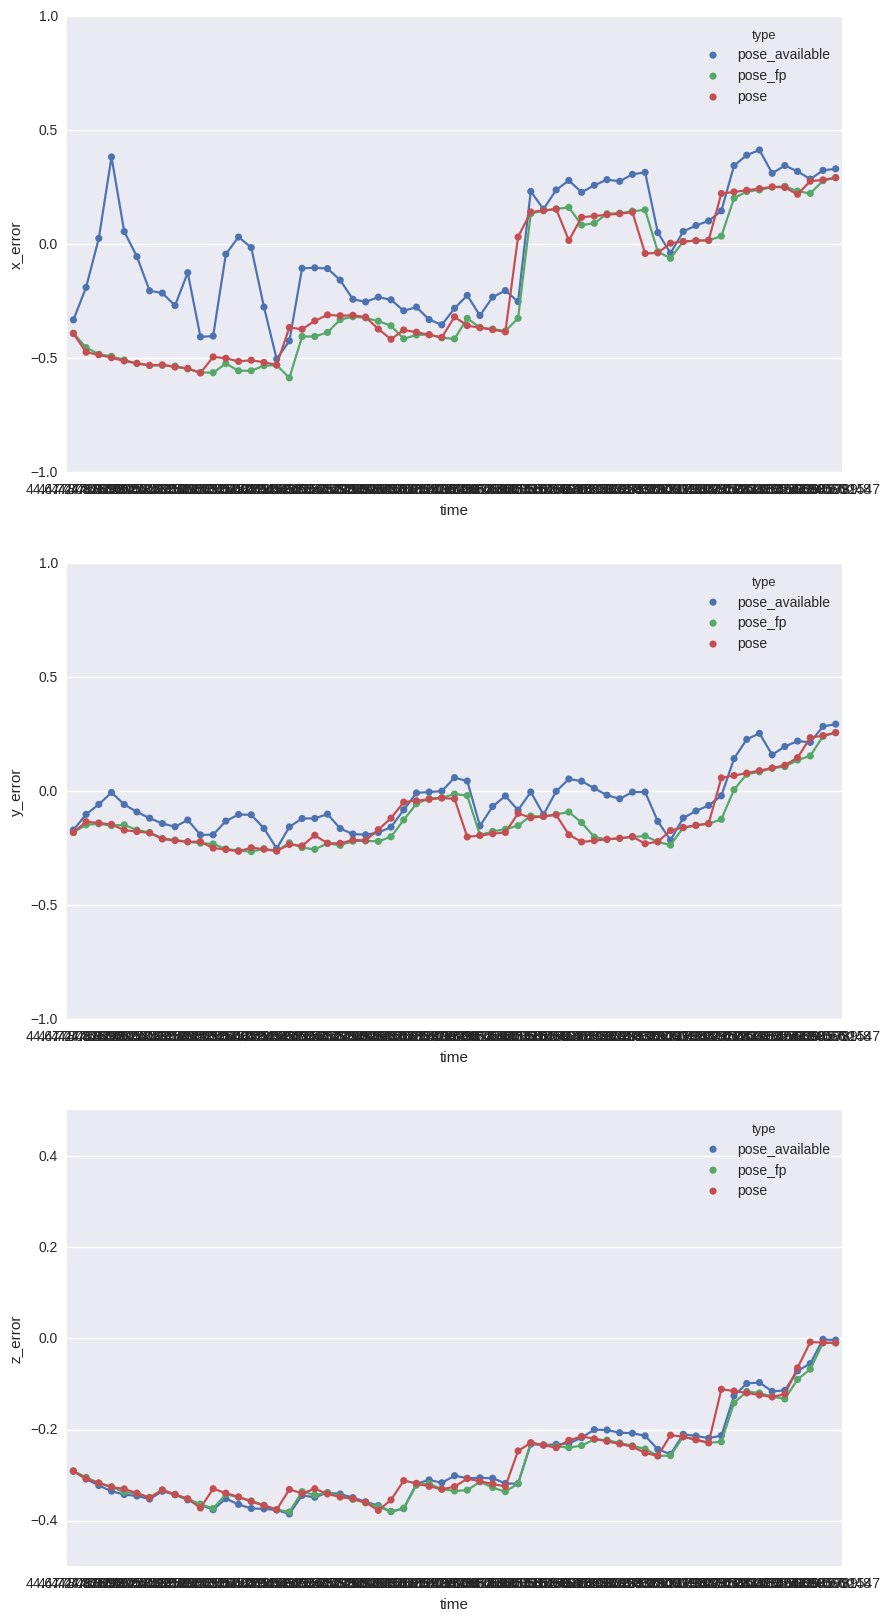

time           47.5295
type    pose_available
x             -0.20088
y             -0.05454
z              -0.2751
Name: 0, dtype: object


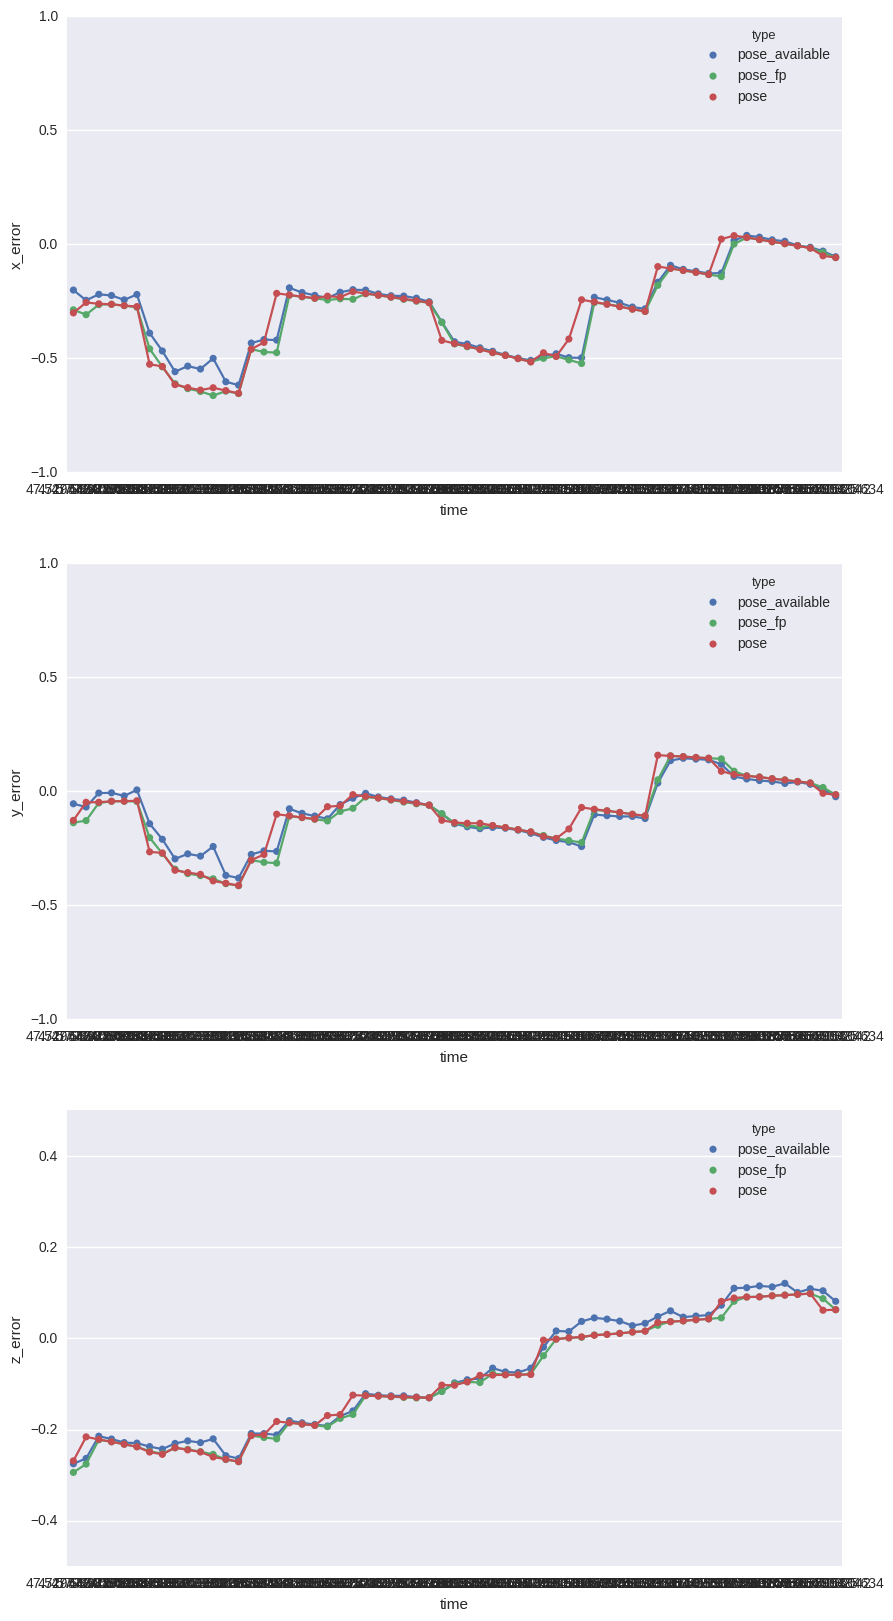

In [4]:
sns.set_style("darkgrid")

for index, value in enumerate(list_of_smoothed_path_df):
    if index < 4:
        continue # this is to not plot data sitting on ground
    print value.iloc[0]
    f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,20))
    ax1 = sns.pointplot(x="time", y="x", hue="type", data=value, ax=ax1, scale=0.5)
    ax2 = sns.pointplot(x="time", y="y", hue="type", data=value, ax=ax2, scale=0.5)
    ax3 = sns.pointplot(x="time", y="z", hue="type", data=value, ax=ax3, scale=0.5)
    for ax in [ax1, ax2, ax3]:
        ax.set(xlabel='time')
        ax.set_ylim(-1,1)
    ax3.set_ylim(-0.5,0.5)
    ax1.set(ylabel="x_error")
    ax2.set(ylabel="y_error")
    ax3.set(ylabel="z_error")
    plt.show()